In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft
from IPython.display import Audio
import librosa as lib

In [6]:
#Abrir audio en formato wav (Canto en Aula Magna)
sig, fs = lib.load('voice-near.wav') 
Audio("voice-near.wav")

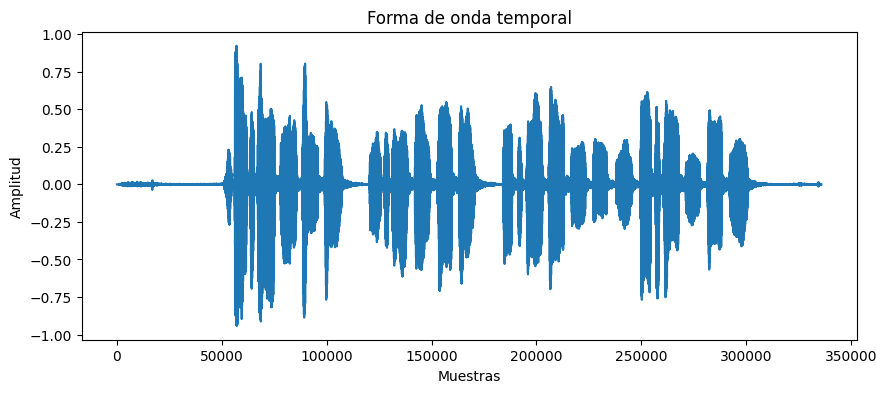

In [7]:
#Plantear la forma de onda temporal
plt.figure(figsize=(10, 4))
plt.plot(sig)
plt.title('Forma de onda temporal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

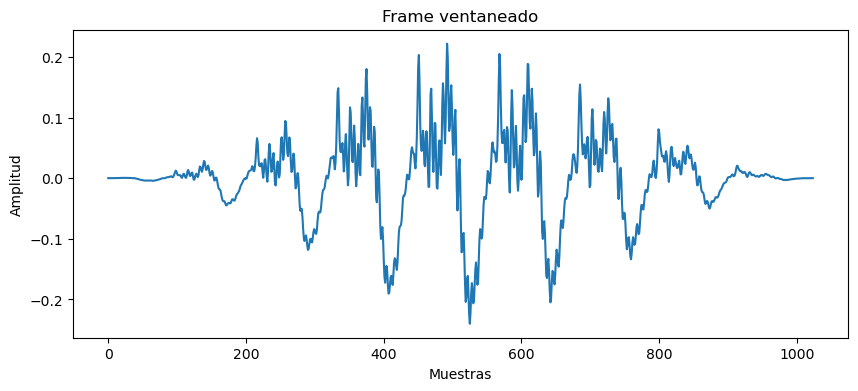

In [96]:
#Ventanear la señal de audio
def ventanas(x, len_f, overlap):
    x = x.tolist()
    num_f = int(round(len(x) / (len_f - (len_f * overlap))))
    matriz_frames = []
    for i in range(num_f):
        frame = x[int(i * round(len_f * overlap)):int(i * round(len_f * overlap)) + len_f]
        while len(frame) < len_f:
            frame.append(0)
        matriz_frames.append(frame)
    matf = np.array(matriz_frames)
    return matf

len_f = 1024
overlap = 0.5
sig_frames = ventanas(sig, len_f, overlap)

# Aplicar ventana 
ventana = signal.windows.hann(len_f)
sig_frames_ventana = sig_frames * ventana

# Graficar un frame ventaneado
plt.figure(figsize=(10, 4))
plt.plot(sig_frames_ventana[10])
plt.title('Frame ventaneado')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [97]:
# Aplicar FFT a todos los frames
sigfft_frames = np.apply_along_axis(fft, 1, sig_frames_ventana)
magsigfft_frames = np.abs(sigfft_frames)


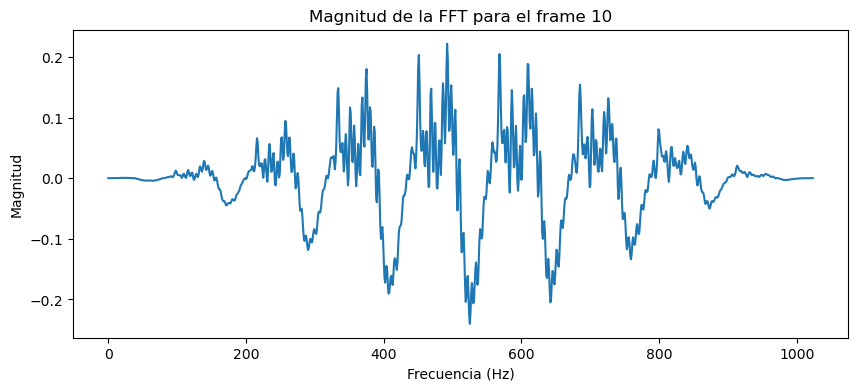

In [98]:
# Graficar la magnitud de la FFT para uno de los frames
plt.figure(figsize=(10, 4))
plt.plot(sig_frames_ventana[10])
plt.title('Magnitud de la FFT para el frame 10')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()


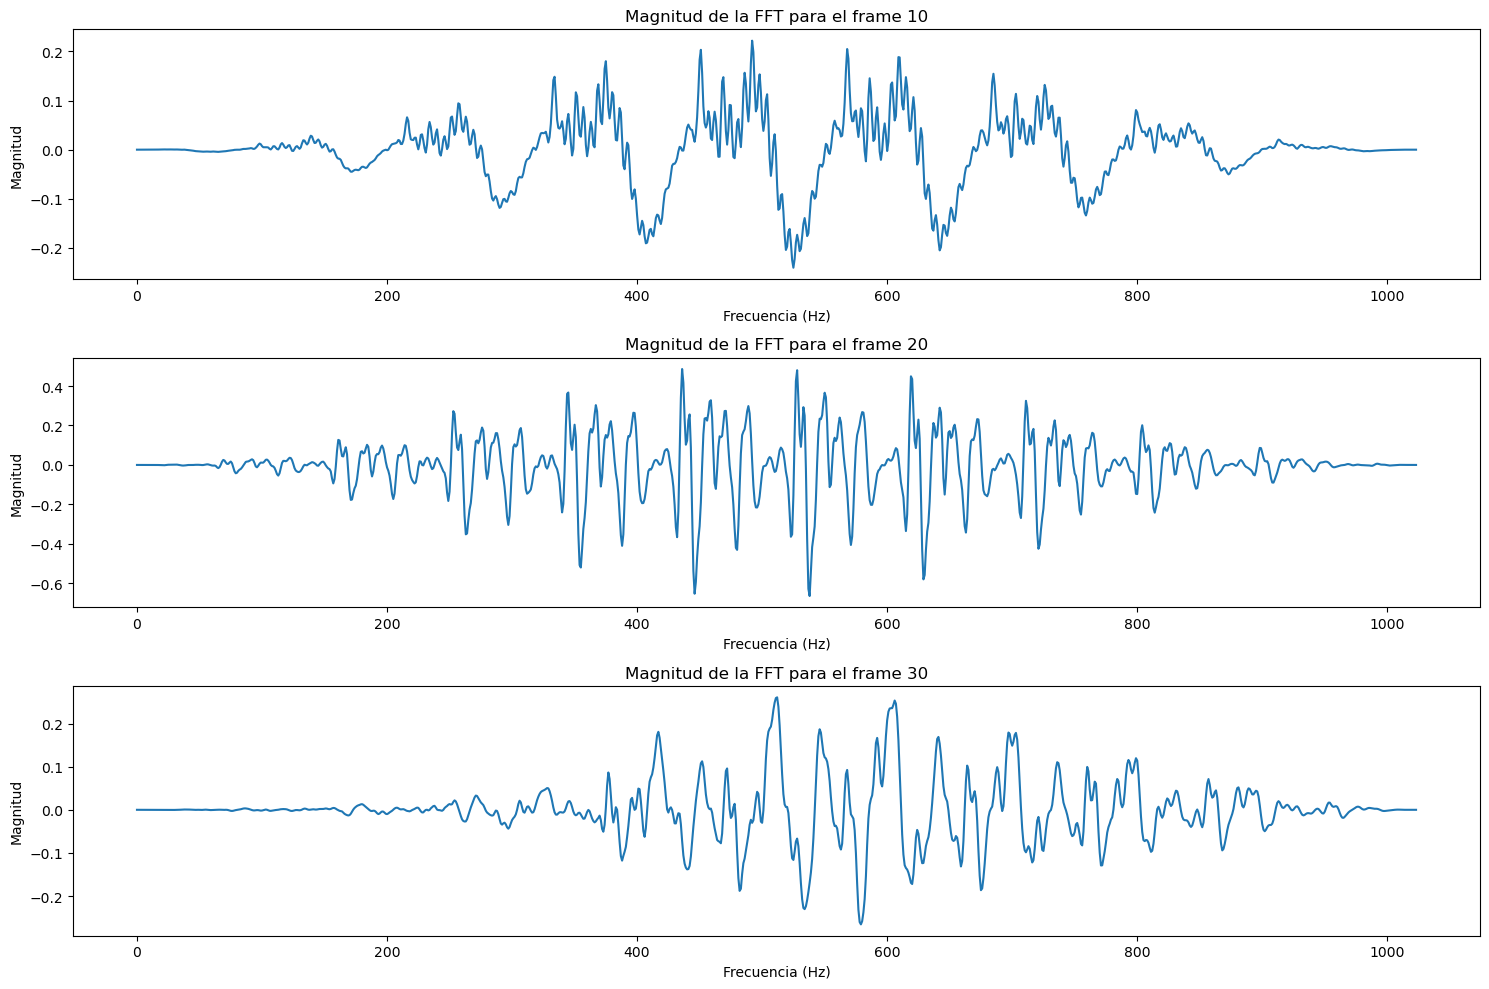

In [99]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(sig_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame}')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()


In [100]:
#Seleccionar 3 tipos de audios: Biofono (Cuervo), Antropofono (Canto Aula Magna) y Geofono (Viento)

# Rutas de los archivos de audio
ruta_biofono = 'audios-tarea3/crowsnorm.wav'
ruta_antropofono = 'audios-tarea3/voice-near.wav'
ruta_geofono = 'audios-tarea3/viento.wav'

# Cargar audios
biofono, fs = lib.load(ruta_biofono)
antropofono, fs = lib.load(ruta_antropofono)
geofono, fs = lib.load(ruta_geofono)


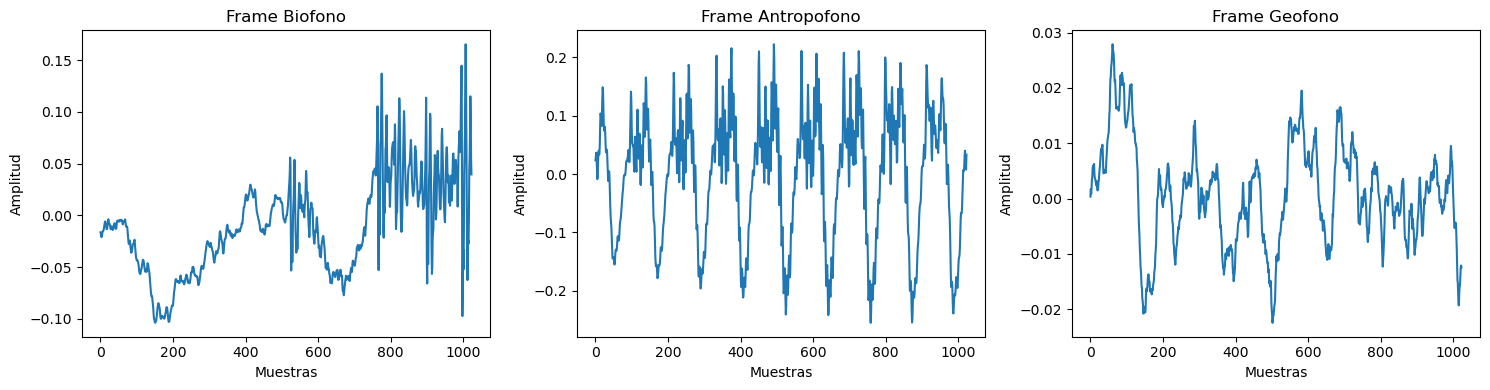

In [101]:
# Seleccionar algunos frames de cada audio

bio_frames = ventanas(biofono, len_f, overlap)
antro_frames = ventanas(antropofono, len_f, overlap)
geo_frames = ventanas(geofono, len_f, overlap)

# Graficar un frame interesante de cada tipo de audio
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(bio_frames[10])
plt.title('Frame Biofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 2)
plt.plot(antro_frames[10])
plt.title('Frame Antropofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 3)
plt.plot(geo_frames[10])
plt.title('Frame Geofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


In [102]:
# Aplicar FFT a todos los frames del audio Biofono
bio_frames_ventana = bio_frames * ventana
biofft_frames = np.apply_along_axis(fft, 1, bio_frames_ventana)
biofft_frames = np.abs(biofft_frames)

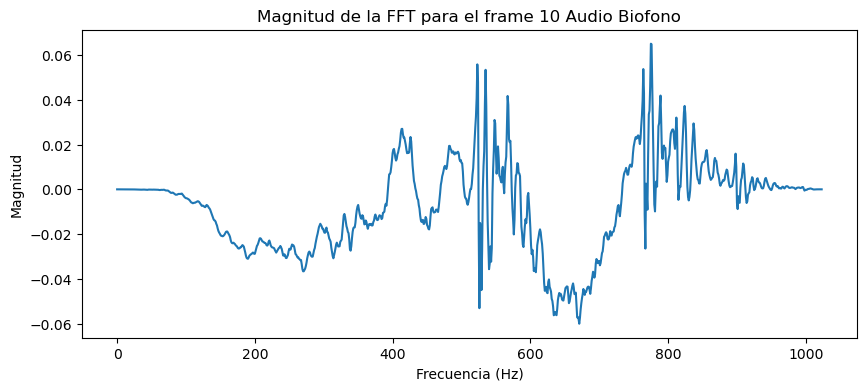

In [103]:
# Graficar la magnitud de la FFT para uno de los frames
plt.figure(figsize=(10, 4))
plt.plot(bio_frames_ventana[10])
plt.title('Magnitud de la FFT para el frame 10 Audio Biofono')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()


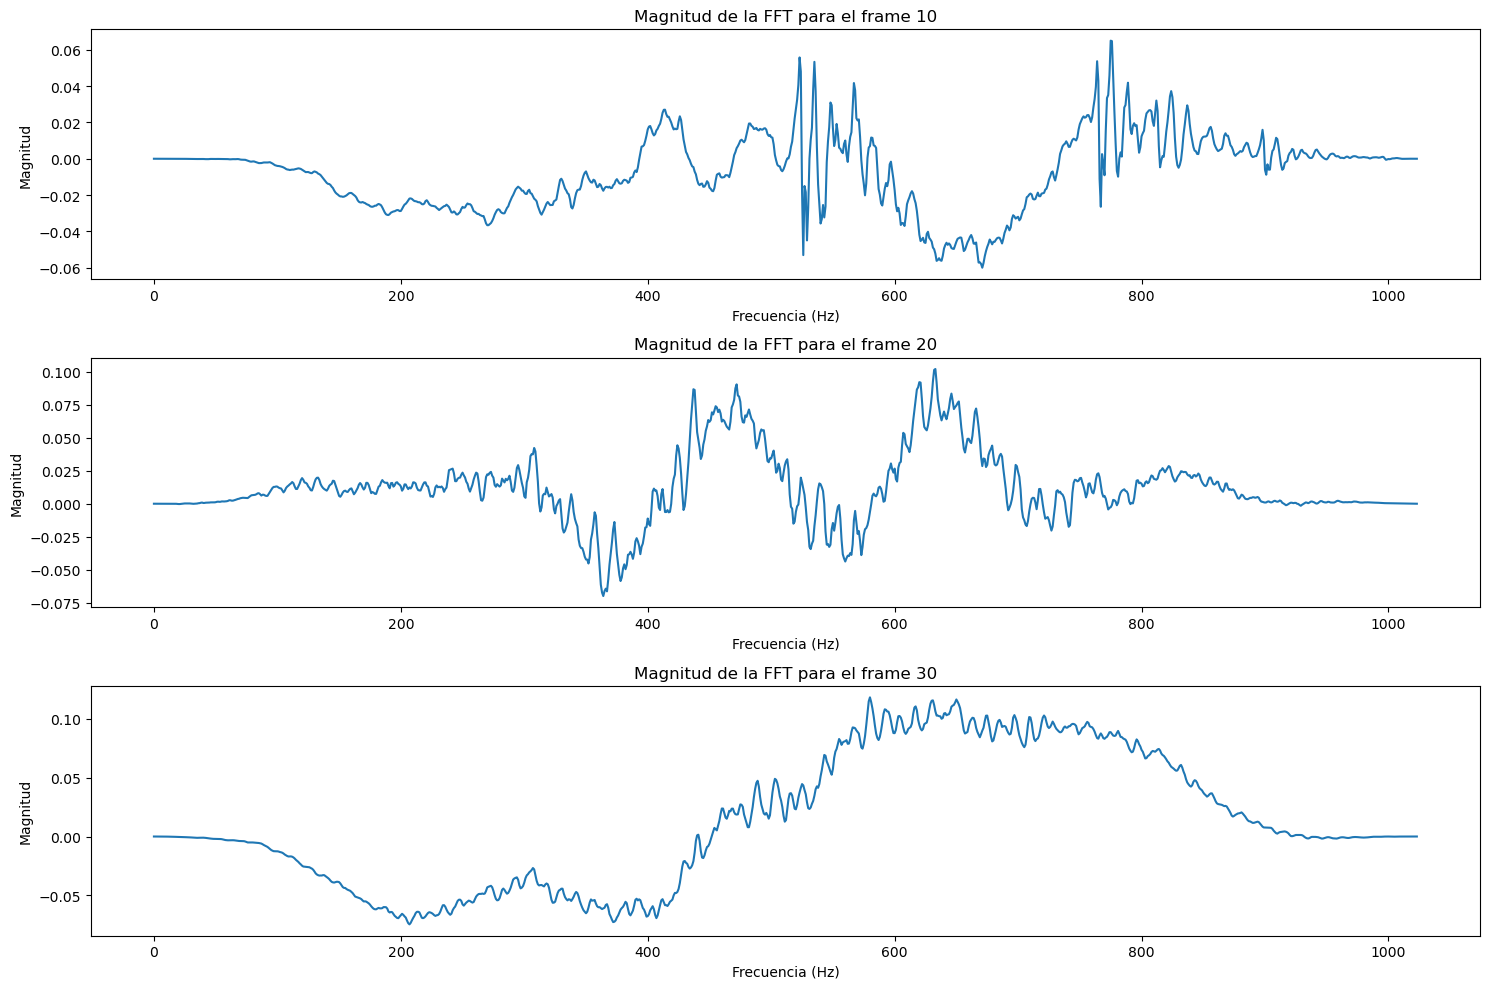

In [104]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(bio_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame}')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

In [105]:
# Aplicar FFT a todos los frames del audio Antropofono
antro_frames_ventana = antro_frames * ventana
antrofft_frames = np.apply_along_axis(fft, 1, antro_frames_ventana)
antrofft_frames = np.abs(antrofft_frames)

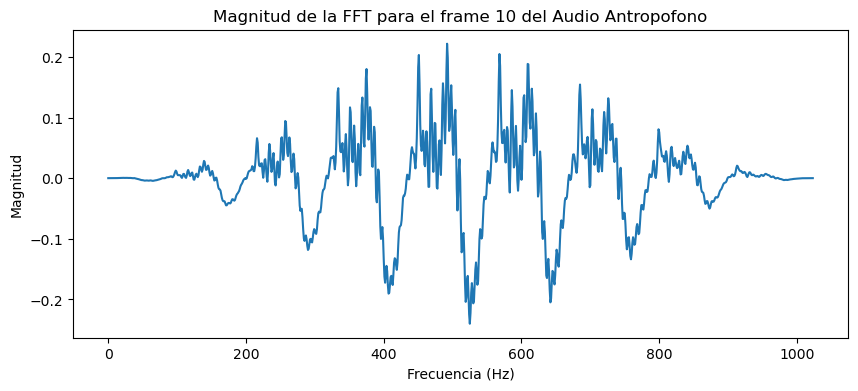

In [106]:
# Graficar la magnitud de la FFT para uno de los frames
plt.figure(figsize=(10, 4))
plt.plot(antro_frames_ventana[10])
plt.title('Magnitud de la FFT para el frame 10 del Audio Antropofono')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()


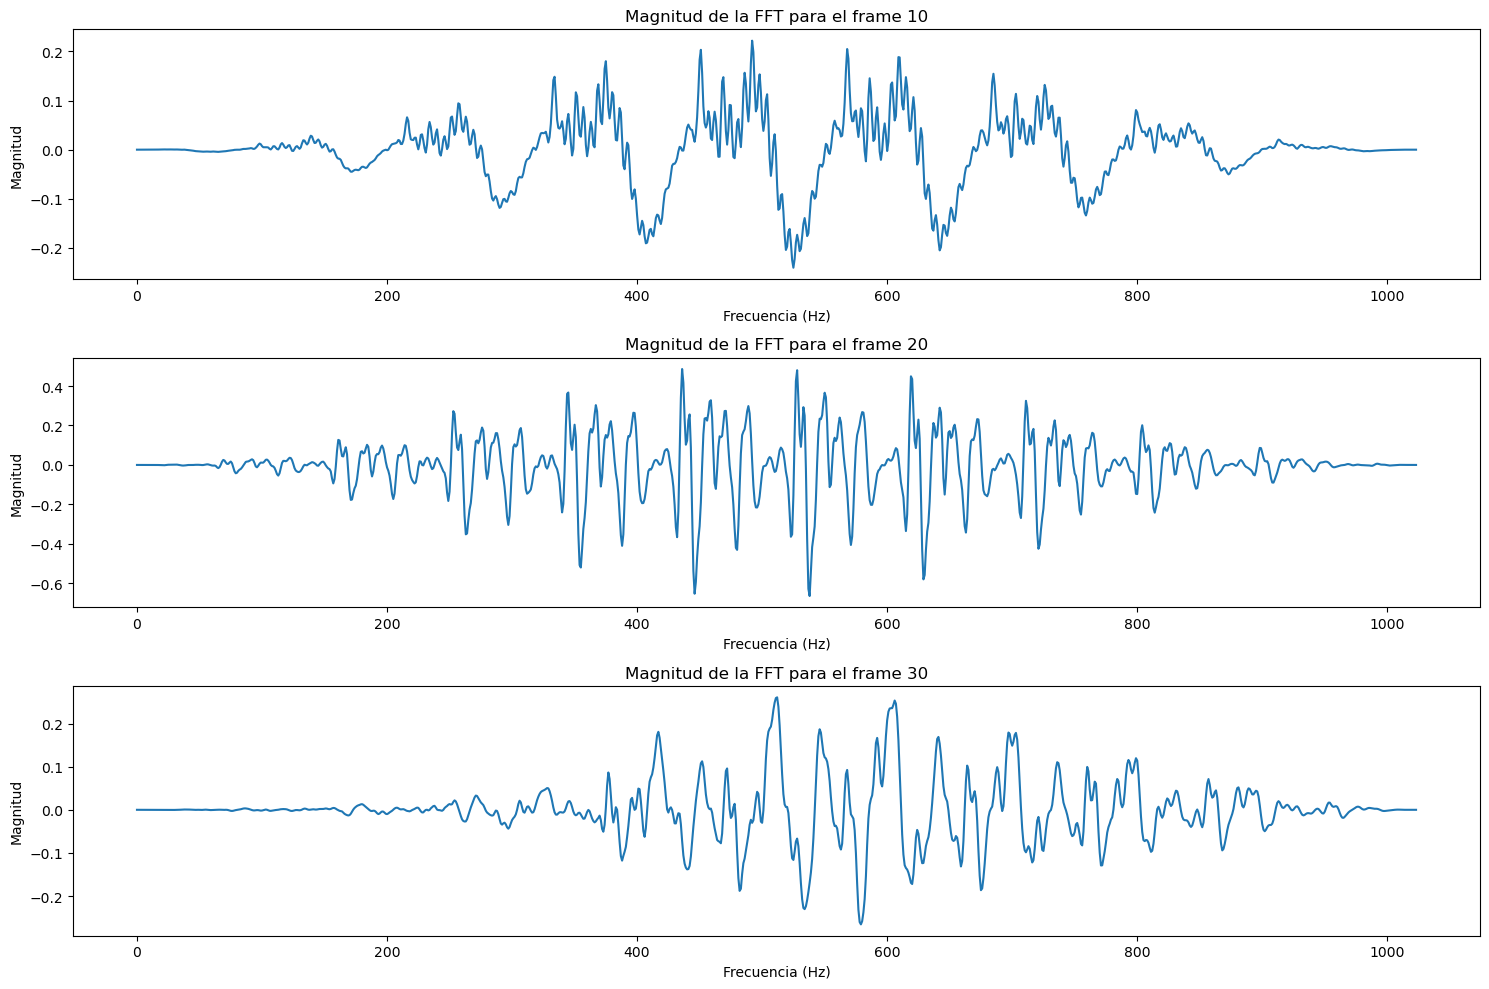

In [107]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(antro_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame}')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

In [108]:
# Aplicar FFT a todos los frames del audio Geofono
geo_frames_ventana = geo_frames * ventana
geofft_frames = np.apply_along_axis(fft, 1, geo_frames_ventana)
geofft_frames = np.abs(geofft_frames)

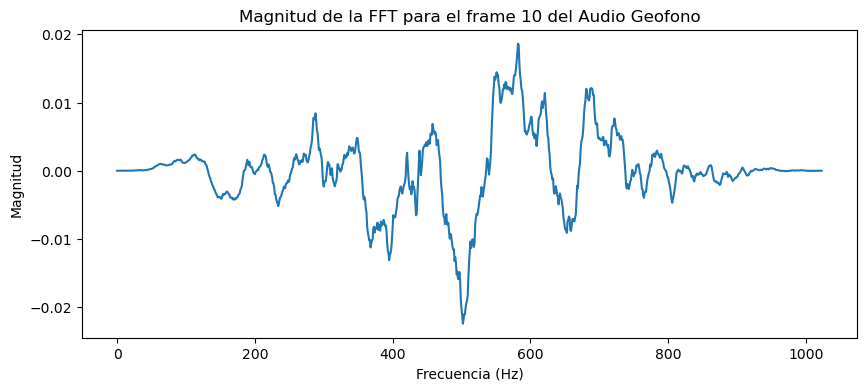

In [109]:
# Graficar la magnitud de la FFT para uno de los frames
plt.figure(figsize=(10, 4))
plt.plot(geo_frames_ventana[10])
plt.title('Magnitud de la FFT para el frame 10 del Audio Geofono')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()

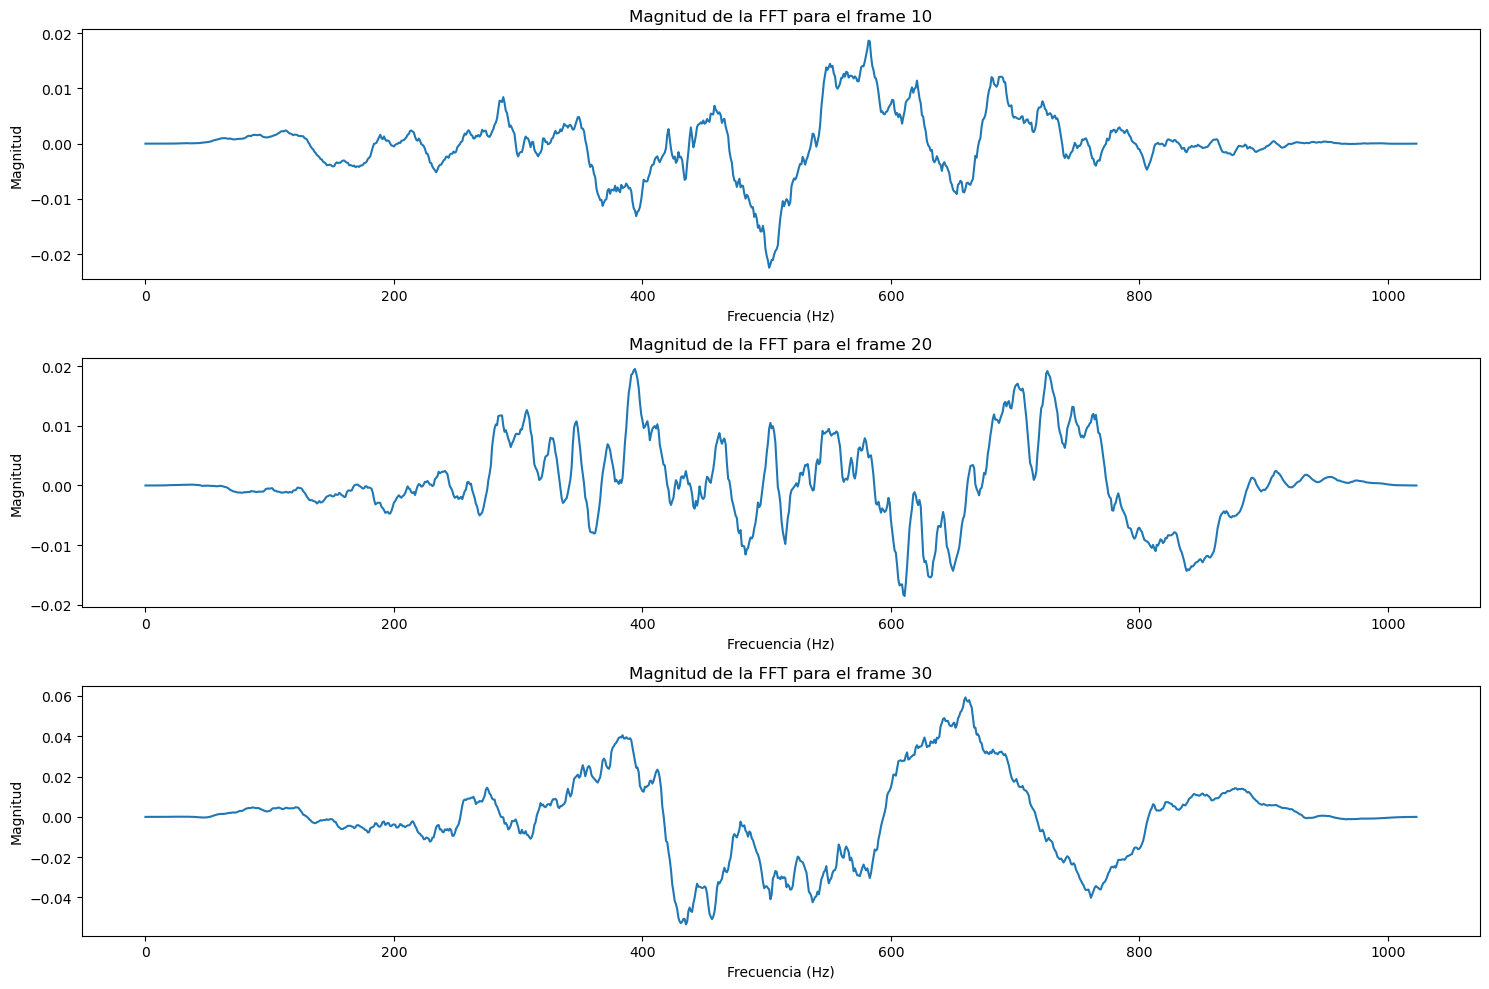

In [110]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(geo_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame}')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()